# The Quantum Phase Estimation Algorithm

In this tutorial, you will run the Quantum Phase Estimation algorithm using the Sampler primitive Qiskit Runtime program.

TODO
Add context of why QPE is important and why Sampler is advantagous to conventional backend.run() method for running QPE.

## Set up your local development environment

This tutorial requires a Qiskit Runtime service instance. If you haven't done so already, please follow the [Getting Started Guide](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/getting_started.html) to set one up.

## Background information

### Quantum phase estimation

TODO: Improve explanations. Why is QPE important?

Quantum phase estimation is one of the most important subroutines in quantum computation. It serves as a central building block for many quantum algorithms. The objective of the algorithm is the following:

Given a unitary operator $U$, the algorithm estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$. Here $|\psi\rangle$ is an eigenvector and $e^{\boldsymbol{2\pi i}\theta}$ is the corresponding eigenvalue. Since $U$ is unitary, all of its eigenvalues have a norm of 1.

If you want to learn more, you can read the chapter about quantum phase estimation in [the Qiskit textbook](https://learn.qiskit.org/course/ch-algorithms/quantum-phase-estimation).

## Step 1: Create QPE circuits and bind parameters to the circuits

### Create QPE circuits

TODO: Add descriptions of what is happening here.

In [1]:
import numpy as np

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import PhaseGate, QFT

def create_qpe_circuit(phase, num_qubits):
    # Create circuit
    aux = QuantumRegister(size=num_qubits, name='aux')  # auxillary register for reading out the phase
    phi = QuantumRegister(size=1, name='phi')  # register with eigenvector |phi>
    cr = ClassicalRegister(size=num_qubits, name='readout')
    qpe = QuantumCircuit(aux, phi, cr)

    # Prepare |phi>
    qpe.x(phi)

    # Create superposition in aux register
    qpe.barrier()
    qpe.h(aux)  

    # Apply C-U black box
    qpe.barrier()
    for j in range(num_qubits):
        unitary = QuantumCircuit(1, name='U^2**'+str(j))
        unitary.p(phase*(2**j), 0)
        qpe.compose(unitary.control(), [j] + phi[:], inplace=True)
        #qpe.cp(phase*(2**j), j, num_qubits)

    # Apply inverse QFT
    qpe.barrier()
    qpe = qpe.compose(QFT(num_qubits, inverse=True))

    # Measure
    qpe.barrier()
    qpe.measure(aux, cr)

    return qpe

### Bind parameters to QPE circuits

TODO: add description of what is happening here. Highlight why Sampler primitive is better than backend.run

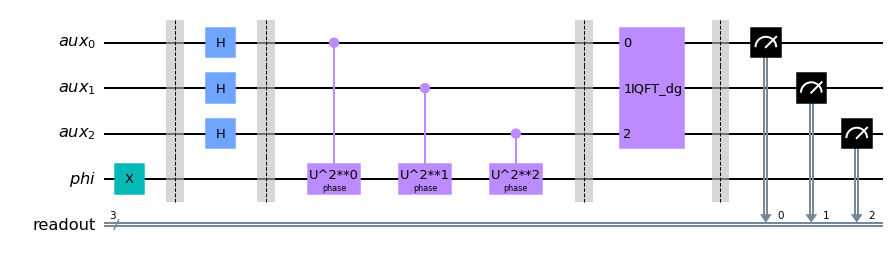

In [2]:
from qiskit.circuit import Parameter

phase = Parameter('phase')

qpe_circuit = create_qpe_circuit(phase, 3)
qpe_circuit.draw('mpl',fold=-1)

In [3]:
number_of_phases = 80
phases = np.linspace(0, 4*np.pi, number_of_phases)
# Phases need to be expressed as list of lists
individual_phases = [[ph] for ph in phases]

## Step 2: Submit the circuits to a quantum computer on the cloud

### Connect to the Qiskit Runtime service 

First, connect to the Qiskit Runtime service instance that you created in [the first step](#Set-up-your-local-development-environment).

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
options = {'backend_name': 'ibmq_qasm_simulator'}  # use the simulator

### Run the circuits using the Sampler primitive

TODO: add description

In [5]:
from qiskit_ibm_runtime import Sampler

with Sampler(circuits=qpe_circuit, service=service, options=options) as sampler:
    param_results = sampler(circuits=[0]*len(phases), parameter_values=individual_phases)

RuntimeJobFailureError: 'Unable to retrieve job result. Job cb1fo1r4isr7hsmlpj0g has failed:\n2022-07-04T09:41:18.034908534-05:00 Traceback (most recent call last):\n2022-07-04T09:41:18.034908534-05:00   File "/code/program_starter.py", line 63, in <module>\n2022-07-04T09:41:18.034908534-05:00     user_params = json.loads(params, cls=ProgramRuntimeDecoder)\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/json/__init__.py", line 370, in loads\n2022-07-04T09:41:18.034908534-05:00     return cls(**kw).decode(s)\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/json/decoder.py", line 337, in decode\n2022-07-04T09:41:18.034908534-05:00     obj, end = self.raw_decode(s, idx=_w(s, 0).end())\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/json/decoder.py", line 353, in raw_decode\n2022-07-04T09:41:18.034908534-05:00     obj, end = self.scan_once(s, idx)\n2022-07-04T09:41:18.034908534-05:00   File "/provider/programruntime/utils.py", line 100, in object_hook\n2022-07-04T09:41:18.034908534-05:00     return super().object_hook(obj)\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/site-packages/qiskit/providers/ibmq/runtime/utils.py", line 266, in object_hook\n2022-07-04T09:41:18.034908534-05:00     return _decode_and_deserialize(obj_val, qpy_serialization.load)[0]\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/site-packages/qiskit/providers/ibmq/runtime/utils.py", line 109, in _decode_and_deserialize\n2022-07-04T09:41:18.034908534-05:00     orig = deserializer(buff)\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/site-packages/qiskit/qpy/interface.py", line 167, in load\n2022-07-04T09:41:18.034908534-05:00     binary_io.read_circuit(\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/site-packages/qiskit/qpy/binary_io/circuits.py", line 779, in read_circuit\n2022-07-04T09:41:18.034908534-05:00     _read_instruction(file_obj, circ, out_registers, custom_instructions, version, vectors)\n2022-07-04T09:41:18.034908534-05:00   File "/usr/local/lib/python3.8/site-packages/qiskit/qpy/binary_io/circuits.py", line 250, in _read_instruction\n2022-07-04T09:41:18.034908534-05:00     gate = gate_class(*params)\n2022-07-04T09:41:18.034908534-05:00 TypeError: __init__() missing 2 required positional arguments: \'num_qubits\' and \'params\'\n'

## Step 3: Analyze results

TODO
- Remove these helper functions or move them under the cover
- Add descriptions

In [ ]:
def evaluate_wrap(phase, phi):
    # Choose whether to wrap or not. Phase is the problem phase. Phi is the computation output.
    if np.abs(wrapAngle(phi) - phase/(2*np.pi)) < np.abs(phi - phase/(2*(np.pi))):
        return wrapAngle(phi)
    else:
        return phi
    
def output_to_phi(bitstring):
    bin_exp = 0
    for ind, stringbit in enumerate(bitstring):
        bin_exp += int(stringbit)/2**(ind+1)
    return bin_exp

def wrapAngle(phase):
    # This function maps the interval \varphi \in [0,1] into [-0.5, 0.5], where the sub-inverval [0.5,1] moves into [-0.5,0] and the interval [0,0.5] remains untouched
    # phases between pi and 2pi become negative.
    phase_wrapped = ((phase*2*np.pi + np.pi) % (2 * np.pi) - np.pi)/(2*np.pi)
    return phase_wrapped

def most_likely_bitstring(dictionary):
    return max(dictionary, key=dictionary.get)

In [ ]:
def most_likely_bits(dictionary, phi):

    # Return the IPE result if one looks at the most likely outcome and if one looks at the two most likely
    # outcomes.
    val = list(dictionary.values())
    val.sort()
    counts_left = 0
    counts_right = 0
    most_likely_counts = val[-1]

    # First we compute the second most likely key without enforcing neighborhood:

    if len(dictionary) > 1:

        second_most_likely_counts = val[-2]

    else:

        second_most_likely_counts = most_likely_counts

    for key, value in dictionary.items():

        if value == most_likely_counts:

            most_likely_key = key

        if value == second_most_likely_counts:

            if len(dictionary) > 1 and val[-2] == val[-1]:

                second_most_likely_key = [key for key, value in dictionary.items() if value == val[-2] and key != most_likely_key]
                second_most_likely_key = second_most_likely_key[0]
            else:
                second_most_likely_key = key


    neighbor_left = len(most_likely_key)*'1' if most_likely_key == len(most_likely_key)*'0' else format((int(most_likely_key,2)-1), '0%sb'%len(most_likely_key))
    neighbor_right = len(most_likely_key)*'0' if most_likely_key == len(most_likely_key)*'1' else format((int(most_likely_key,2)+1), '0%sb'%len(most_likely_key))

    if len(dictionary) > 1:

        # First check if neighbor keys exist

        if neighbor_left in dictionary.keys():

            counts_left = dictionary[neighbor_left]

        if neighbor_right in dictionary.keys():

            counts_right = dictionary[neighbor_right]

    else:

        second_most_likely_neighbor_key = most_likely_key
        second_most_likely_neighbor_counts = most_likely_counts

    if counts_left == 0 and counts_right == 0:

        second_most_likely_neighbor_key = most_likely_key
        second_most_likely_neighbor_counts = most_likely_counts

    else:

        if counts_left > counts_right:

            second_most_likely_neighbor_key = neighbor_left
            second_most_likely_neighbor_counts = counts_left

        else:

            second_most_likely_neighbor_key = neighbor_right
            second_most_likely_neighbor_counts = counts_right


    # Here we have a dictionary with the outcomes, the two most likely bitstrings and their counts.
    # We want to return the most likely bitstring and an average of the counts of the two most
    # likely bitstrings

    most_likely_bit_phase = evaluate_wrap(2*np.pi*phi, output_to_phi(most_likely_key))
    second_most_likely_neighbor_bit_phase = evaluate_wrap(2*np.pi*phi,output_to_phi(second_most_likely_neighbor_key))
    second_most_likely_bit_phase = evaluate_wrap(2*np.pi*phi, output_to_phi(second_most_likely_key))


    # Now average both second most likely keys.
#     numer = (most_likely_counts*most_likely_bit_phase + second_most_likely_counts*second_most_likely_bit_phase)
#     denom = (most_likely_counts+second_most_likely_counts)
#     two_most_likely_bits_phase = numer/denom

    numer = (most_likely_counts*most_likely_bit_phase + second_most_likely_neighbor_counts*second_most_likely_neighbor_bit_phase)
    denom = (most_likely_counts+second_most_likely_neighbor_counts)
    two_most_likely_neighbor_bits_phase = numer/denom

    return two_most_likely_neighbor_bits_phase

In [ ]:
qpe_solution = []
for idx, results in enumerate(param_results.quasi_dists):
    solution = most_likely_bitstring(results)
    phase = evaluate_wrap(phases[idx], output_to_phi(solution))
#     phase = output_to_phi(solution)
    qpe_solution.append(2*np.pi*phase)

In [ ]:
qpe_solution = []
for idx, results in enumerate(param_results.quasi_dists):
    solution = most_likely_bits(results, phases[idx]/(2*np.pi))
    qpe_solution.append(2*np.pi*solution)

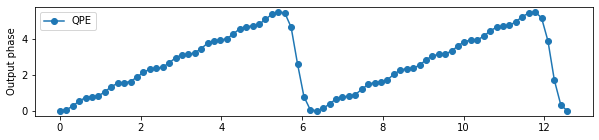

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 2))
plt.plot(phases, qpe_solution, 'o-', label='QPE')

plt.ylabel('Output phase')
plt.legend()

TODO:
- Add summary
- Add qiskit-ibm-runtime version
- Add qiskit version table
- Add qiskit copyright